# **Titanic - Machine Learning from Disaster**

## **Predict survival on the Titanic and get familiar with ML basics**
https://www.kaggle.com/competitions/titanic

## **Mission : 타이타닉 침몰에서 승객의 생존 여부 예측**

### **평가지표: accuracy**

### **문제유형: 이진분류**

#### **사용 모델 : XGBoost LightGBM Catboost Ensemble Model**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

!pip3 install xgboost
!pip3 install lightgbm
!pip install catboost

import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

!pip install optuna 
import optuna

In [2]:
train = pd.read_csv(r"C:\Users\degas\Desktop\titanic\train.csv").drop(columns=['PassengerId'], axis=1)
test = pd.read_csv(r"C:\Users\degas\Desktop\titanic\test.csv").drop(columns=['PassengerId'], axis=1)
submission = pd.read_csv(r"C:\Users\degas\Desktop\titanic\gender_submission.csv")

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [5]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [7]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [8]:
def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns={'index': '피처 값'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고윳값 개수'] = df.nunique().values
  summary['첫 번째 값'] = df.loc[0].values
  summary['두 번째 값'] = df.loc[1].values
  return summary

summary1 = resumetable(train)
summary2 = resumetable(test)

데이터셋 형상: (891, 11)
데이터셋 형상: (418, 10)


In [9]:
summary1

,피처 값,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,Survived,int64,0,2,0,1
1,Pclass,int64,0,3,3,1
2,Name,object,0,891,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,Sex,object,0,2,male,female
4,Age,float64,177,88,22.0,38.0
5,SibSp,int64,0,7,1,1
6,Parch,int64,0,7,0,0
7,Ticket,object,0,681,A/5 21171,PC 17599
8,Fare,float64,0,248,7.25,71.2833
9,Cabin,object,687,147,NaN,C85


In [10]:
summary2

,피처 값,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,Pclass,int64,0,3,3,3
1,Name,object,0,418,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)"
2,Sex,object,0,2,male,female
3,Age,float64,86,79,34.5,47.0
4,SibSp,int64,0,7,0,1
5,Parch,int64,0,8,0,0
6,Ticket,object,0,363,330911,363272
7,Fare,float64,1,169,7.8292,7.0
8,Cabin,object,327,76,NaN,NaN
9,Embarked,object,0,3,Q,S


## **feature 알아보기**

- 01. PassengerId
    - 승객 번호
    - 인덱스 번호와 동일하므로 drop
    - type : int64
  

- 02. Survived
    - 생존 여부
    - 0 : No, 1 : Yes
    - 타겟 피쳐, 학습 시 drop
    - type : int64
  

- 03. Pclass
    - Ticketc class 
    - 1 = 1st, 2 = 2nd, 3 = 3rd
    - type : int64
  

- 04. Name
    - 승객 이름
    - type : object
  

- 05. Sex
    - 성별
    - 종류 : male, female
    - type : object
  

- 06. Age
    - 승객 나이
    - 결측값 존재(train, test)
    - type : float64
  

- 07. SibSp
    - 형제자매/배우자 수
    - type : int64
  

- 08. Parch
    - 부모/자녀 수
    - type : int64
  

- 09. Ticket
    - 티켓 번호
    - type : object


- 10. Fare
    - 운임료
    - type : float64
  

- 11. Cabin
    - 선실 번호
    - 결측값 존재(train, test)
    - type : object


- 12. Embarked
    - 중간 정착 항구
    - C : 쉘부르 / Q: 퀸스타운 / S 사우샘프턴
    - 결측값 존재(train)
    - type : object


In [11]:
# type별 피쳐 분리

# 이진형 피쳐(타겟 변수 제외)
bin_cols = ['Sex']

# 순서형 피쳐 & 명목형 피쳐
ord_nom_cols= ['Pclass', 'SibSp', 'Parch', 'Embarked']

# 연속형 피쳐
con_cols = ['Age', 'Fare']

# 기타
name_cols = ['Name', 'Ticket', 'Cabin']


## **EDA**

In [12]:
def write_percent(ax, total_size):
# 도향 객체를 순회하며 막대 그래프 상단에 타깃값 비율 표시
  for patch in ax.patches:
    height = patch.get_height()       # 도형 높이(데이터 개수)
    width = patch.get_width()         # 도형 너비
    left_coord = patch.get_x()        # 도형 왼쪽 테두리의 x축 위치
    percent = height/total_size*100   # 타깃값 비율

    # (x, y) 좌표에 텍스트 입력
    ax.text(left_coord + width/2.0,      # x축 위치
            height + total_size *0.001,  # y축 위치
            '{:1.1f}%'.format(percent),  # 입력 텍스트
             ha='center')                # 가운데 정렬

Survived
0    549
1    342
Name: count, dtype: int64

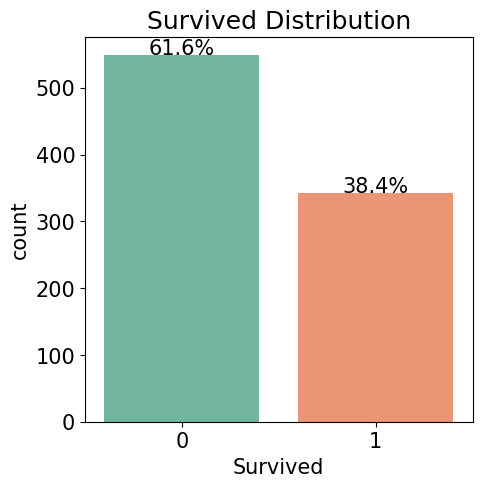

In [13]:
# 타깃값 분포
mpl.rc('font', size=15)
plt.figure(figsize=(5,5))

ax = sns.countplot(x='Survived', data=train, palette='Set2')
write_percent(ax, len(train))
ax.set_title('Survived Distribution')

train['Survived'].value_counts()

# 생존과 사망 비율 6:4 

In [14]:
# 이진 피처
print(train['Sex'].value_counts())
print()

Sex
male      577
female    314
Name: count, dtype: int64



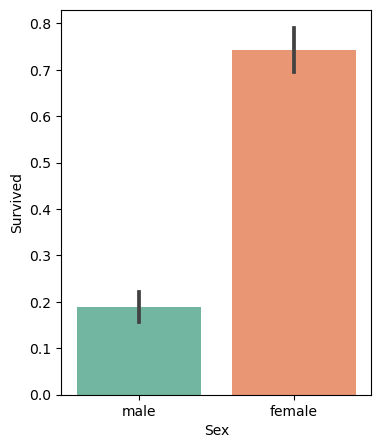

In [15]:
# 이진 피처의 고윳값별 타깃값 비율
def plot_target_ratio_by_features(df, features, num_rows, num_cols, size=(12,8), bins=None):
  mpl.rc('font', size=10)
  plt.figure(figsize=size)
  grid = gridspec.GridSpec(num_rows, num_cols)
  plt.subplots_adjust(wspace=0.5, hspace=0.5)

  for idx, feature in enumerate(features):
    ax = plt.subplot(grid[idx]) 
    sns.barplot(x=feature, y='Survived', data=train, palette='Set2', ax=ax)

plot_target_ratio_by_features(train, bin_cols, 1, 2, (10, 5))

# Sex oht 대상

In [16]:
# 순서 피처
print(train['Pclass'].value_counts())
print()

print(train['SibSp'].value_counts())
print()

print(train['Parch'].value_counts())
print()

# 명목 피처
print(train['Embarked'].value_counts())
print('Embarked 결측값 개수 :', train['Embarked'].isnull().sum())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked 결측값 개수 : 2


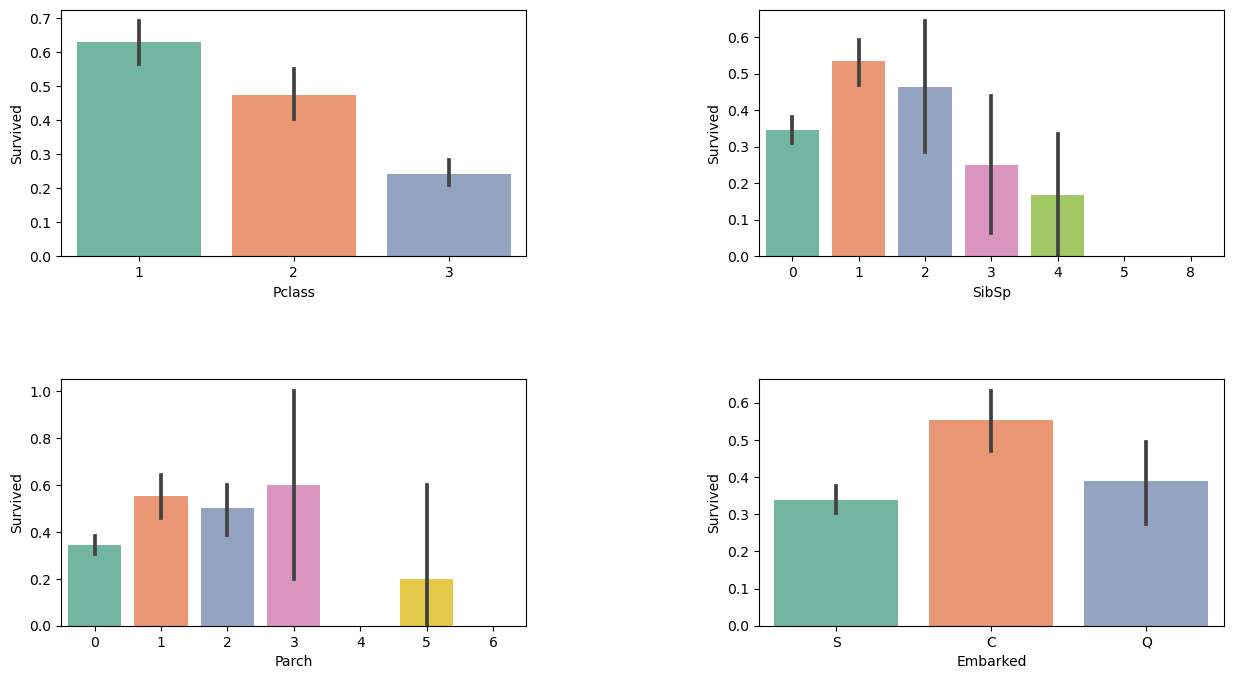

In [17]:
# 순서형 변수 & 명목형 변수

train['Embarked'].fillna('S', inplace=True)

plot_target_ratio_by_features(train, ord_nom_cols, 2, 2, (15, 8))
# SibSp Parch 신뢰구간이 큰 부분 존재, 단 신뢰상한과 신뢰하한이 크다면 제거 X
# Embarked oht 대상

fellow
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64
fellow
1    163
2     89
3     59
4     21
7      4
6      3
5      3
Name: count, dtype: int64


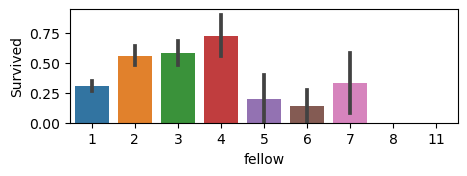

In [18]:
# SibSp & Parch에 따른 생존율

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(3,1,1)

train['fellow'] = train['SibSp'] + train['Parch'] + 1 # 최소 1 : 1은 동행자 X
test['fellow'] = test['SibSp'] + test['Parch'] + 1 # 최소 1 : 1은 동행자 X

print(train['fellow'].value_counts(ascending=False)) #  부모/자녀 수 
print(train.fellow[train['Survived']==1].value_counts(ascending=False)) # 부모/자녀 수에 따른 생존율
sns.barplot(x='fellow', y='Survived', data=train, ax=ax1)
# 동승자가 많을 수록 생존율 증가

# 기존 Parch SibSp 데이터 삭제
train = train.drop(['Parch', 'SibSp'], axis=1)
test = test.drop(['Parch', 'SibSp'], axis=1)

Age
1.0    562
0.0    179
2.0    128
3.0     22
Name: count, dtype: int64


<Axes: xlabel='Age', ylabel='Survived'>

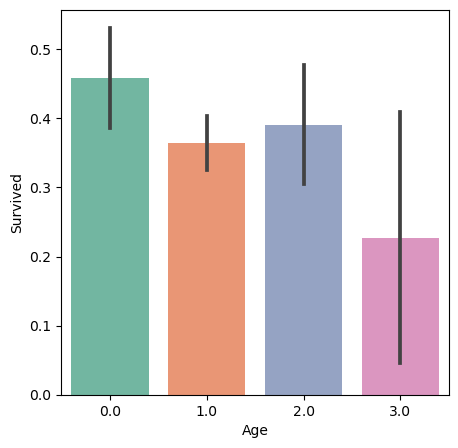

In [19]:
# 연속형 변수 -> 범주형 변수로 변환

# Age

# 결측값 대치
train['Age'].fillna(train['Age'].mean(), inplace=True)

train.loc[train['Age'] <= 20, 'Age'] = 0
train.loc[(train['Age'] > 20) & (train['Age'] <= 40), 'Age'] = 1
train.loc[(train['Age'] > 40) & (train['Age'] <= 60), 'Age'] = 2
train.loc[train['Age'] > 60, 'Age'] = 3

test.loc[test['Age'] <= 20, 'Age'] = 0
test.loc[(test['Age'] > 20) & (test['Age'] <= 40), 'Age'] = 1
test.loc[(test['Age'] > 40) & (test['Age'] <= 60), 'Age'] = 2
test.loc[test['Age'] > 60, 'Age'] = 3

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1,1,1)

print(train['Age'].value_counts())
sns.barplot(x='Age', y='Survived', data=train, palette='Set2', ax=ax1)

Fare
2.0    229
0.0    223
3.0    222
1.0    217
Name: count, dtype: int64


<Axes: xlabel='Fare', ylabel='Survived'>

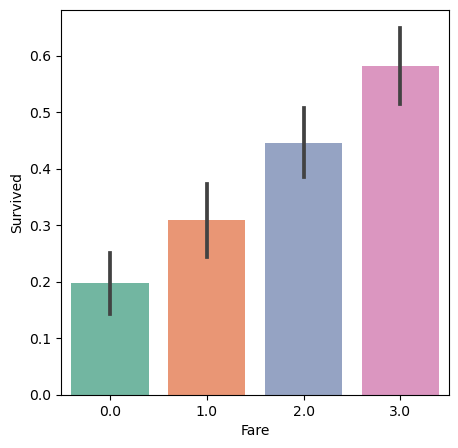

In [20]:
# Fare를 범주형 변수로 변형

# train['Fare_class'] = pd.qcut(train['Fare'], 4)
# train['Fare_class']

train.loc[train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare'] = 2
train.loc[(train['Fare'] > 31),'Fare'] = 3

test.loc[test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare'] = 2
test.loc[(test['Fare'] > 31),'Fare'] = 3

# train = train.drop(['Fare_class'], axis=1, inplace=True)

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1,1,1)

print(train['Fare'].value_counts())
sns.barplot(x='Fare', y='Survived', data=train, palette='Set2', ax=ax1)

## **Feature 분석 정리**

### **이진형 변수**

- Sex
    - 여성의 생존율이 남성의 생존율보다 높다.
    - 범주형 변수 변환 대상
    - 종류 : male, female
    - type : object


### **순서형 피쳐 & 명목형 피쳐**

- Pclass
    - 객실의 등급이 좋을 수록 생존율이 높다.
    - One_Hot_Encoding 대상
    - 객실 등급 : 1, 2, 3
    - type : int64

- SibSp
    - Parch 피쳐와 합쳐 동승자 피쳐로 대체, 동승자가 적을수록 생존율이 높다.
    - type : int64

- Parch
    - SibSp 피쳐와 합쳐 동승자 피쳐로 대체, 동승자가 적을수록 생존율이 높다.
    - type : int64

- Embarked
    - 범주형 변수 변환 대상
    - 승선항이 C일 때 생존율이 높다.
    - 결측치는 최빈값인 S로 대체
    - type : object


### **연속형 피쳐**

- Age
    - 결측값은 평균값으로 대체
    - 4구간으로 나누어 시용
    - 20~30세의 승객들의 생존율이 높다.
    - type : float64

- Fare
    - 결측값은 중앙값으로 대체
    - 운임료가 높을수록 생존율이 높다.
    - 4구간으로 나누어 시용
    - type : float64


### **기타 피쳐**

- Name
    - 정규 표현식을 사용해 남성과 여성으로 구분
    - type : object

- Ticket
    - 사용하지 않으므로 삭제 예정
    - type : object

- Cabin
    - 결측값이 많아 삭제 예정
    - type : object


## **Feature Engineering**

In [21]:
train = pd.read_csv(r"C:\Users\degas\Desktop\titanic\train.csv").drop(columns=['PassengerId'], axis=1)
test = pd.read_csv(r"C:\Users\degas\Desktop\titanic\test.csv")
submission = pd.read_csv(r"C:\Users\degas\Desktop\titanic\gender_submission.csv")

In [22]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# 결측값 대치 및 범주형 변수로 변환

In [24]:
# 1. Name 

# Dot(.) 메타 문자는 줄바꿈 문자인 \n을 제외한 모든 문자와 매치됨
train['Title_name'] = train.Name.str.extract(' ([a-zA-Z]+)\.', expand=False)

# 피벗테이블은 그룹 빈도를 계산하기 위한 피벗테이블의 특수한 경우
pd.crosstab(train['Title_name'], train['Sex'])

# Sex 0은 남자 1은 여자
train['Title_name'] = train['Title_name'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr' , 
                                             'Jonkheer','Lady', 'Major','Rev','Sir'], 'etc')
train['Title_name'] = train['Title_name'].replace('Mlle', 'Miss')
train['Title_name'] = train['Title_name'].replace('Ms', 'Miss')
train['Title_name'] = train['Title_name'].replace('Mme', 'Mrs')

test['Title_name'] = test.Name.str.extract(' ([a-zA-Z]+)\.', expand=False)
print(pd.crosstab(test['Title_name'], test['Sex']))

test['Title_name'] = test['Title_name'].replace(['Col', 'Dona', 'Dr', 'Rev'], 'etc')
test['Title_name'] = test['Title_name'].replace('Ms', 'Miss')


train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)


train['Title_name'] = train['Title_name'].map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'etc':4})
test['Title_name'] = test['Title_name'].map({'Mr':0, 'Miss': 1, 'Mrs':2, 'Master':3, 'etc':4})

Sex         female  male
Title_name              
Col              0     2
Dona             1     0
Dr               0     1
Master           0    21
Miss            78     0
Mr               0   240
Mrs             72     0
Ms               1     0
Rev              0     2


In [25]:
# 2. Sex
train['Sex'] = train['Sex'].map({'male' : 0, 'female' : 1}).astype(int)
test['Sex'] = test['Sex'].map({'male' : 0, 'female' : 1}).astype(int)

In [26]:
# 3. Age
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(train['Age'].mean(), inplace=True)

train.loc[train['Age'] <= 20, 'Age'] = 0
train.loc[(train['Age'] > 20) & (train['Age'] <= 40), 'Age'] = 1
train.loc[(train['Age'] > 40) & (train['Age'] <= 60), 'Age'] = 2
train.loc[train['Age'] > 60, 'Age'] = 3

test.loc[test['Age'] <= 20, 'Age'] = 0
test.loc[(test['Age'] > 20) & (test['Age'] <= 40), 'Age'] = 1
test.loc[(test['Age'] > 40) & (test['Age'] <= 60), 'Age'] = 2
test.loc[test['Age'] > 60, 'Age'] = 3

In [27]:
# 4. Fare
test['Fare'].fillna(test['Fare'].median(), inplace=True)

train.loc[train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare'] = 2
train.loc[(train['Fare'] > 31),'Fare'] = 3

test.loc[test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare'] = 2
test.loc[(test['Fare'] > 31),'Fare'] = 3

In [28]:
# 5. SibSp & Parch

train['fellow'] = train['SibSp'] + train['Parch'] + 1 
test['fellow'] = test['SibSp'] + test['Parch'] + 1 

train = train.drop(['Parch', 'SibSp'], axis=1)
test = test.drop(['Parch', 'SibSp'], axis=1)

In [29]:
# 6. Embarked

train['Embarked'].fillna('S', inplace=True)

train['Embarked'] = train['Embarked'].map({'S' : 0, 'C' : 1, 'Q': 2}).astype(int)
test['Embarked'] = test['Embarked'].map({'S' : 0, 'C' : 1, 'Q': 2}).astype(int)

In [30]:
# 사용하지 않는 피쳐 삭제

train = train.drop(['Cabin', 'Ticket'], axis=1)
test = test.drop(['Cabin', 'Ticket'], axis=1)

In [31]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title_name,fellow
0,0,3,0,1.0,0.0,0,0,2
1,1,1,1,1.0,3.0,1,2,2
2,1,3,1,1.0,1.0,0,1,1
3,1,1,1,1.0,3.0,0,2,2
4,0,3,0,1.0,1.0,0,0,1


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    int32  
 6   Title_name  891 non-null    int64  
 7   fellow      891 non-null    int64  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [33]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title_name,fellow
0,892,3,0,1.0,0.0,2,0,1
1,893,3,1,2.0,0.0,0,2,2
2,894,2,0,3.0,1.0,2,0,1
3,895,3,0,1.0,1.0,0,0,1
4,896,3,1,1.0,1.0,0,2,3


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int32  
 6   Title_name   418 non-null    int64  
 7   fellow       418 non-null    int64  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.0 KB


## **Model Baseline & Modeling**

In [35]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2002)

In [36]:
# 1. 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(accuracy_score(y_test, rf_pred))

0.8379888268156425


In [37]:
# 2. 선형회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(accuracy_score(y_test, lr_pred))

0.8100558659217877


In [38]:
# kfold 교차 검증

In [39]:
from sklearn.model_selection import KFold

def titanic_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds,  shuffle=True, random_state=42)
    scores = []

    for idx, (train_idx, test_idx) in enumerate(kfold.split(X)):
        X_train, X_test = X.values[train_idx], X.values[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, predictions)
        scores.append(acc)
        print('교차 검증 {0} 정확도 : {1:4f}'.format(idx, acc))

    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))

titanic_kfold(rf, folds=10)

교차 검증 0 정확도 : 0.811111
교차 검증 1 정확도 : 0.831461
교차 검증 2 정확도 : 0.797753
교차 검증 3 정확도 : 0.831461
교차 검증 4 정확도 : 0.808989
교차 검증 5 정확도 : 0.853933
교차 검증 6 정확도 : 0.808989
교차 검증 7 정확도 : 0.808989
교차 검증 8 정확도 : 0.775281
교차 검증 9 정확도 : 0.876404
평균 정확도: 0.8204


In [40]:
titanic_kfold(lr, folds=10)

교차 검증 0 정확도 : 0.800000
교차 검증 1 정확도 : 0.764045
교차 검증 2 정확도 : 0.831461
교차 검증 3 정확도 : 0.775281
교차 검증 4 정확도 : 0.865169
교차 검증 5 정확도 : 0.853933
교차 검증 6 정확도 : 0.786517
교차 검증 7 정확도 : 0.741573
교차 검증 8 정확도 : 0.775281
교차 검증 9 정확도 : 0.887640
평균 정확도: 0.8081


In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5)

for idx, acc in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:4f}'.format(idx, acc))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.776536
교차 검증 1 정확도 : 0.797753
교차 검증 2 정확도 : 0.848315
교차 검증 3 정확도 : 0.831461
교차 검증 4 정확도 : 0.837079
평균 정확도: 0.8182


In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X, y, cv=5)

for idx, acc in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:4f}'.format(idx, acc))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.810056
교차 검증 1 정확도 : 0.820225
교차 검증 2 정확도 : 0.797753
교차 검증 3 정확도 : 0.814607
교차 검증 4 정확도 : 0.814607
평균 정확도: 0.8114


In [43]:
# GridSearch

In [44]:
'''
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [100, 200, 300],
          'max_depth': [2,3,4,5,8,10],
          'min_samples_split': [2,3,5],
          'min_samples_leaf': [1,3,5,8]}

grid_rf = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=5)
grid_rf.fit(X_train, y_train)

print(grid_rf.best_params_)
print(grid_rf.best_score_)
'''

"\nfrom sklearn.model_selection import GridSearchCV\n\nparams = {'n_estimators' : [100, 200, 300],\n          'max_depth': [2,3,4,5,8,10],\n          'min_samples_split': [2,3,5],\n          'min_samples_leaf': [1,3,5,8]}\n\ngrid_rf = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=5)\ngrid_rf.fit(X_train, y_train)\n\nprint(grid_rf.best_params_)\nprint(grid_rf.best_score_)\n"

In [45]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

X_train = train.drop(['Survived'], axis=1)
X_test = test.drop(['PassengerId'], axis=1)
y_train = train['Survived']

In [46]:
rf = RandomForestClassifier(n_estimators=300,
                            max_depth=4,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            random_state=2)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
score = round(rf.score(X_train, y_train)*100, 2)
print(score)

83.73


In [47]:
submission['Survived'] = rf.predict(X_test)

submission.to_csv('submission.csv', index=False)

submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
